# Solution for Attrition Project

## 1. Launching

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("general_data.csv")
dataset.head()
# In Attrition block '0' means 'No and '1' means 'Yes'

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [2]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## 2. Data Treatment

In [3]:
dataset.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [5]:
# Removing the duplicates
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,0,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


## 3. Univariant Analysis

In [6]:
# Mean, Standard Deviation, Minimum, Quartiles, Maximum
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].describe()
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [7]:
# Median
dataset2=dataset[['Age','DistanceFromHome','Education','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].median()
dataset2

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [8]:
# Mode
dataset3=dataset[['Age','DistanceFromHome','Education','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].mode()
dataset3

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [9]:
# Variance
dataset4=dataset[['Age','DistanceFromHome','Education','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].var()
dataset4

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [10]:
# Skewness
dataset5=dataset[['Age','DistanceFromHome','Education','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].skew()
dataset5

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [11]:
# Kurtosis
dataset6=dataset[['Age','DistanceFromHome','Education','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].kurt()
dataset6

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

#### Scatter Plot

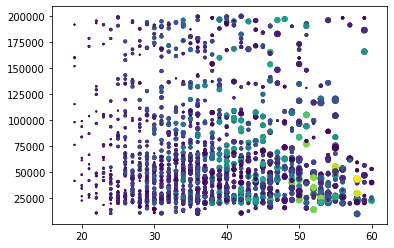

In [12]:
plt.scatter(dataset.Age,dataset.MonthlyIncome,dataset.TotalWorkingYears,dataset.YearsAtCompany)

#### Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa0b984888>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa0b987888>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa0b97cec8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa0b987fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa0b98cf88>],
 'means': []}

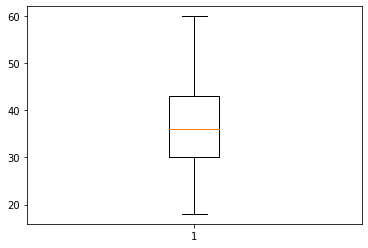

In [15]:
box_plot=dataset.Age
plt.boxplot(box_plot)

Age is normally distributed without any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa0c9b3a88>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa0c9b8c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa0b9dff08>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa0c9bcd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa0c9bce08>],
 'means': []}

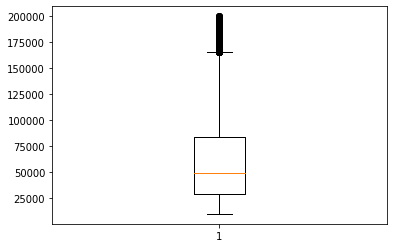

In [16]:
box_plot=dataset.MonthlyIncome
plt.boxplot(box_plot)

Monthly Income is Right skewed with several outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa0ca22448>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa0ca22d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa0ca1dac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa0ca26dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa0ca29dc8>],
 'means': []}

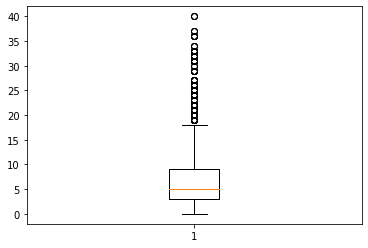

In [17]:
box_plot=dataset.YearsAtCompany
plt.boxplot(box_plot)

Years at company is also Right Skewed with several outliers observed.

#### Inference from the analysis:
a)All the above variables show positive skewness; while Age & Mean_distance_from_home
are leptokurtic and all other variables are platykurtic.

b)The Mean_Monthly_Income’s IQR is at 54K suggesting company wide attrition across all income bands.

c)Mean age forms a near normal distribution with 13 years of IQR

#### Outliers:
There’s no regression found while plotting Age, MonthlyIncome, TotalWorkingYears,
YearsAtCompany, etc., on a scatter plot

## 4. Statistical Test

In [2]:
#loading sheet with atrrition=yes
attr_yes=pd.read_excel("data_Attrition.xlsx",sheet_name=0)
d1=attr_yes.dropna()
d1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
1,28,1,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
2,47,1,0n-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
3,44,1,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
4,26,1,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2


In [3]:
#loading sheet with atrrition=No
attr_No=pd.read_excel("data_Attrition.xlsx",sheet_name=1)
d0=attr_No.dropna()
d0.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
2,38,0,0n-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
3,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
4,46,0,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7


In [5]:
print("Attrition_Yes=>\n",d1.columns,"\n\n\nAttrition_No=>\n",d0.columns)

Attrition_Yes=>
 Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 


Attrition_No=>
 Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### Mann-Whitney Test
##### To compare 2 independent samples
#### Atrition Vs Distance from home

In [6]:
# importing Mann-Whitney package
from scipy.stats import mannwhitneyu

H0 – There is no significant difference in the DistanceFromHome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)
 
H1 - There is significant difference in the DistanceFromHome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [7]:
stats , p = mannwhitneyu(d0.DistanceFromHome,d1.DistanceFromHome)
print(stats,p)

1295261.0 0.488538986087403


p is 0.48853 which is >= 0.05 therfore H1 is rejected and H0 is accepted.

#### Attrition Vs Income
H0 – There is no significant difference in the MonthlyIncome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in the MonthlyIncome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [8]:
stats , p = mannwhitneyu(d0.MonthlyIncome,d1.MonthlyIncome)
print(stats,p)

1249573.5 0.06508807631576838


p is 0.06508 which is >= 0.05 therfore H1 is rejected and H0 is accepted.

#### Attrition Vs YearsWithCurrentManager
H0 – There is no significant difference in the YearsWithCurrentManager of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in the YearsWithCurrentManager of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [9]:
stats , p = mannwhitneyu(d0.YearsWithCurrManager,d1.YearsWithCurrManager)
print(stats,p)

945958.5 5.420302388722274e-31


p is 5.420302388722274e-31 which is <0.05 therefore the H0 is rejected and H1 is accepted

#### Attrition Vs Years at company
H0 – There is no significant difference in the Years at company of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in the Years at company of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [10]:
stats , p = mannwhitneyu(d0.YearsAtCompany,d1.YearsAtCompany)
print(stats,p)

912579.0 3.3433144809752036e-36


p is 3.3433144809752036e-36 which is <0.05 therefore the H0 is rejected and H1 is accepted

#### Attrition Vs Total Working Years
H0 – There is no significant difference in the Total Working Years of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in Total Working Years of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [11]:
stats , p = mannwhitneyu(d0.TotalWorkingYears,d1.TotalWorkingYears)
print(stats,p)

895173.5 2.741211827689903e-39


p is 2.741211827689903e-39 which is <0.05 therefore the H0 is rejected and H1 is accepted

#### Attrition Vs JobLevel
H0 – There is no significant difference in the JobLevel of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in JobLevel of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [12]:
stats , p = mannwhitneyu(d0.JobLevel,d1.JobLevel)
print(stats,p)

1288305.5 0.3940631141019965


p is 0.394063 which is >= 0.05 therfore H1 is rejected and H0 is accepted.

#### Attrition Vs PercentSalaryHike
H0 – There is no significant difference in the PercentSalaryHike of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in PercentSalaryHike of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [13]:
stats , p = mannwhitneyu(d0.PercentSalaryHike,d1.PercentSalaryHike)
print(stats,p)

1231873.5 0.017810794960084964


p is 0.0178107 which is <0.05 therefore the H0 is rejected and H1 is accepted



### Sample independent T-Test
##### To compare the mean of 2 independent samples

In [14]:
# importing independent t-test package
from scipy.stats import ttest_ind

#### Attrition Vs PercentSalaryHike
H0 – There is no significant difference in the PercentSalaryHike of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in PercentSalaryHike of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [15]:
stat, p=ttest_ind(d0.PercentSalaryHike,d1.PercentSalaryHike)
print(stat, p)

-2.1953267956195552 0.028192446935249534


p is 0.0281924 which is <0.05 therefore the H0 is rejected and H1 is accepted

#### Attrition Vs Distance from Home
H0 – There is no significant difference in the DistanceFromHome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in the DistanceFromHome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [16]:
stat, p=ttest_ind(d0.DistanceFromHome,d1.DistanceFromHome)
print(stat, p)

0.6253536318706914 0.5317715668047676


p is 0.53177 which is >= 0.05 therfore H1 is rejected and H0 is accepted.

#### Attrition Vs Total Working Years
H0 – There is no significant difference in the Total Working Years of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in Total Working Years of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [17]:
stat, p=ttest_ind(d0.TotalWorkingYears,d1.TotalWorkingYears)
print(stat, p)

11.39422669317641 1.1645434967153693e-29


p is 1.1645434967153693e-29 which is <0.05 therefore the H0 is rejected and H1 is accepted

#### Attrition Vs Years at company
H0 – There is no significant difference in the Years at company of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in the Years at company of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [18]:
stat, p=ttest_ind(d0.YearsAtCompany,d1.YearsAtCompany)
print(stat, p)

8.881225486705604 9.476118084889976e-19


p is 9.476118084889976e-19 which is <0.05 therefore the H0 is rejected and H1 is accepted

#### Attrition Vs YearsWithCurrentManager
H0 – There is no significant difference in the YearsWithCurrentManager of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in the YearsWithCurrentManager of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [19]:
stat, p=ttest_ind(d0.YearsWithCurrManager,d1.YearsWithCurrManager)
print(stat, p)

10.362463400192302 7.105369646808081e-25


p is 7.105369646808081e-25 which is <0.05 therefore the H0 is rejected and H1 is accepted

#### Attrition Vs Income
H0 – There is no significant difference in the MonthlyIncome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

H1 - There is significant difference in the MonthlyIncome of the employee between dataset d1(Attrition_yes) and d0(Attrition_no)

In [20]:
stat, p=ttest_ind(d0.MonthlyIncome,d1.MonthlyIncome)
print(stat, p)

1.9969640177214658 0.045890862744972095


p is 0.04589 which is <0.05 therefore the H0 is rejected and H1 is accepted


## 5. Unsupervised Learning

### Correlation Analysis

In order to find the interdependency of the variables DistanceFromHome, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager from that of Attrition, we executed the Correlation Analysis as follows.

In [21]:
# importing pearsonr package
from scipy.stats import pearsonr as ps

In [26]:
dataset=dataset.dropna()
print(dataset.columns,"\n\n")
dataset.head()

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 




,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


#### Attrition & DistanceFromHome:
H0 – There is no significant correlation in between the Attrition and DistanceFromHome of employee

H1 - There is significant correlation in between the Attrition and DistanceFromHome of employee

In [27]:
s,p=ps(dataset.Attrition,dataset.DistanceFromHome)
print(s,p)

-0.009448638515156248 0.5317715668019558


As r = -0.009, there’s low negative correlation between Attrition and DistanceFromHome and p is 0.531771 which is >=0.05 therefor H1 is rejected and H0 is accepted

#### Attrition & MonthlyIncome
H0 – There is no significant correlation in between the Attrition and MonthlyIncome of employee

H1 - There is significant correlation in between the Attrition and MonthlyIncome of employee

In [28]:
s,p=ps(dataset.Attrition,dataset.MonthlyIncome)
print(s,p)

-0.030160293808460664 0.045890862744719166


correlation r = -0.031, there’s low negative correlation between Attrition and MonthlyIncome and p is 0.045 which is <0.05 therefor H0 is rejected H1 is accepted

#### Attrition & TotalWorkingYears
H0 – There is no significant correlation in between the Attrition and TotalWorkingYears of employee

H1 - There is significant correlation in between the Attrition and TotalWorkingYears of employee

In [29]:
s,p=ps(dataset.Attrition,dataset.TotalWorkingYears)
print(s,p)

-0.1696699168472392 1.1645434967091854e-29


correlation r = -0.1696699, there’s low negative correlation between Attrition and MonthlyIncome and p is 1.1645434967131924e-29 which is <0.05 therefor H0 is rejected H1 is accepted

#### Attrition & Age
H0 – There is no significant correlation in between the Attrition and Age of employee

H1 - There is significant correlation in between the Attrition and Age of employee

In [30]:
s,p=ps(dataset.Attrition,dataset.Age)
print(s,p)

-0.1583986795409671 5.1265982193780794e-26


correlation r = -0.1583, there’s low negative correlation between Attrition and MonthlyIncome and p is 5.1265982193975044e-26 which is <0.05 therefor H0 is rejected H1 is accepted

#### Attrition & YearsAtCompany
H0 – There is no significant correlation in between the Attrition and YearsAtCompany of employee

H1 - There is significant correlation in between the Attrition and YearsAtCompany of employee

In [31]:
s,p=ps(dataset.Attrition,dataset.YearsAtCompany)
print(s,p)

-0.1330026184252154 9.476118084836507e-19


correlation r = -0.133002, there’s low negative correlation between Attrition and MonthlyIncome and p is 9.47611808487322e-19 which is <0.05 therefor H0 is rejected H1 is accepted

#### Attrition & YearsWithCurrManager
H0 – There is no significant correlation in between the Attrition and YearsWithCurrManager of employee

H1 - There is significant correlation in between the Attrition and YearsWithCurrManager of employee

In [32]:
s,p=ps(dataset.Attrition,dataset.YearsWithCurrManager)
print(s,p)

-0.15469153690287274 7.105369646771178e-25


correlation r = -0.154691, there’s low negative correlation between Attrition and MonthlyIncome and p is 7.105369646795425e-25 which is <0.05 therefor H0 is rejected H1 is accepted